<a href="https://colab.research.google.com/github/Arajesh03/Arajesh03/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
# TRAIN DATA
import pandas as pd
import numpy as np
path_train_df = "/content/drive/My Drive/UCLA_WiDS_Team_2/DATA/TRAIN/train_df.csv"
train_df = pd.read_csv(path_train_df)
train_df.head()

,Basic_Demos_Enroll_Year_2015,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,0,1,0,0,0,0,1,0,0,0,...,1,5,0,5,1,0,10,11.245678,1,1
1,0,0,0,0,1,0,0,0,1,0,...,6,8,7,8,10,4,5,11.245678,1,0
2,0,1,0,0,0,0,1,0,0,0,...,2,8,5,7,6,4,9,8.239904,1,0
3,0,0,0,1,0,0,0,0,1,0,...,4,16,9,10,8,4,6,11.245678,1,1
4,0,0,0,0,1,0,0,0,1,0,...,4,11,4,10,7,3,9,8.940679,1,1


In [16]:
# TEST DATA
path_test_df = "/content/drive/My Drive/UCLA_WiDS_Team_2/DATA/TEST/test_df.csv"
test_df = pd.read_csv(path_test_df)
test_df

,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Enroll_Year_2021,Basic_Demos_Enroll_Year_2022,Basic_Demos_Enroll_Year_2023,Basic_Demos_Study_Site_4,Basic_Demos_Study_Site_5,PreInt_Demos_Fam_Child_Ethnicity_0.0,PreInt_Demos_Fam_Child_Ethnicity_1.0,PreInt_Demos_Fam_Child_Ethnicity_2.0,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,0,0,0,1,0,1,0,1,0,0,...,2.000000,12.000000,3.000000,9.000000,2.000000,7.000000,3.000000,0.000000,8.000000,8.992813
1,0,0,0,1,0,1,0,1,0,0,...,1.000000,7.000000,1.000000,6.000000,1.000000,5.000000,1.000000,0.000000,9.000000,7.770933
2,0,0,0,1,0,1,0,1,0,0,...,4.000000,15.000000,4.000000,10.000000,8.000000,6.000000,5.000000,1.000000,6.000000,9.304814
3,0,0,0,1,0,1,0,0,0,1,...,2.000000,18.000000,6.000000,12.000000,5.000000,10.000000,6.000000,0.000000,10.000000,8.261350
4,0,0,0,0,1,1,0,1,0,0,...,1.890511,11.781022,2.390511,7.474453,3.945255,5.583942,4.306569,1.916058,7.726277,13.903718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,1,0,1,0,1,0,0,...,0.000000,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,7.000000,10.262833
250,0,0,0,0,1,1,0,1,0,0,...,1.000000,18.000000,7.000000,7.000000,5.000000,6.000000,11.000000,4.000000,7.000000,7.546999
251,0,0,0,0,1,1,0,1,0,0,...,2.000000,16.000000,2.000000,11.000000,5.000000,9.000000,5.000000,3.000000,8.000000,10.531143
252,0,0,0,1,0,1,0,1,0,0,...,5.000000,21.000000,2.000000,10.000000,6.000000,5.000000,11.000000,9.000000,0.000000,12.212183


In [17]:
adhd = train_df['ADHD_Outcome']
sex = train_df['Sex_F']

In [18]:
num_adhd = train_df['ADHD_Outcome'].value_counts()
num_adhd    #noticed the values are imbalanced

,count
ADHD_Outcome,
1,820
0,382


In [19]:
num_sex = train_df['Sex_F'].value_counts()
num_sex     #noticed the values are imbalanced

,count
Sex_F,
0,787
1,415


In [20]:
def drop_uncommon_columns(df1, df2):
    # Find common columns
    common_columns = df1.columns.intersection(df2.columns)

    # Keep only common columns
    df1 = df1[common_columns]
    df2 = df2[common_columns]

    return df1, df2

train_df, test_df = drop_uncommon_columns(train_df, test_df)

test_df

,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0.0,PreInt_Demos_Fam_Child_Ethnicity_1.0,PreInt_Demos_Fam_Child_Ethnicity_2.0,PreInt_Demos_Fam_Child_Ethnicity_3.0,MRI_Track_Scan_Location_3,MRI_Track_Scan_Location_4,participant_id,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,0,0,1,1,0,0,0,0,1,Cfwaf5FX7jWK,...,2.000000,12.000000,3.000000,9.000000,2.000000,7.000000,3.000000,0.000000,8.000000,8.992813
1,0,0,1,1,0,0,0,0,1,ULliyEXjy4OV,...,1.000000,7.000000,1.000000,6.000000,1.000000,5.000000,1.000000,0.000000,9.000000,7.770933
2,0,0,1,1,0,0,0,1,0,LZfeAb1xMtql,...,4.000000,15.000000,4.000000,10.000000,8.000000,6.000000,5.000000,1.000000,6.000000,9.304814
3,0,0,1,0,0,1,0,0,1,EnFOUv0YK1RG,...,2.000000,18.000000,6.000000,12.000000,5.000000,10.000000,6.000000,0.000000,10.000000,8.261350
4,0,0,1,1,0,0,0,0,1,3VbkvJ22j9Fu,...,1.890511,11.781022,2.390511,7.474453,3.945255,5.583942,4.306569,1.916058,7.726277,13.903718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,1,1,0,0,0,0,1,ZrhtdcUFpSDs,...,0.000000,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,7.000000,10.262833
250,0,0,1,1,0,0,0,0,1,UadZfjdEg7eG,...,1.000000,18.000000,7.000000,7.000000,5.000000,6.000000,11.000000,4.000000,7.000000,7.546999
251,0,0,1,1,0,0,0,1,0,IUEHiLmQAqCi,...,2.000000,16.000000,2.000000,11.000000,5.000000,9.000000,5.000000,3.000000,8.000000,10.531143
252,0,0,1,1,0,0,0,0,1,E3MvDUtJadc5,...,5.000000,21.000000,2.000000,10.000000,6.000000,5.000000,11.000000,9.000000,0.000000,12.212183


In [21]:
train_df

,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0.0,PreInt_Demos_Fam_Child_Ethnicity_1.0,PreInt_Demos_Fam_Child_Ethnicity_2.0,PreInt_Demos_Fam_Child_Ethnicity_3.0,MRI_Track_Scan_Location_3,MRI_Track_Scan_Location_4,participant_id,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,0,0,0,1,0,0,0,0,0,UmrK0vMLopoR,...,0,6,1,5,0,5,1,0,10,11.245678
1,1,0,0,0,1,0,0,1,0,CPaeQkhcjg7d,...,0,18,6,8,7,8,10,4,5,11.245678
2,0,0,0,0,1,0,0,0,0,Nb4EetVPm3gs,...,1,14,2,8,5,7,6,4,9,8.239904
3,0,0,0,1,0,0,0,1,0,p4vPhVu91o4b,...,6,24,4,16,9,10,8,4,6,11.245678
4,1,0,0,1,0,0,0,1,0,M09PXs7arQ5E,...,1,18,4,11,4,10,7,3,9,8.940679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,1,0,0,1,0,0,0,0,0,Atx7oub96GXS,...,1,9,2,7,3,6,2,0,9,10.697923
1198,0,0,0,1,0,0,0,0,0,groSbUfkQngM,...,6,18,3,11,9,5,7,4,7,13.964750
1199,0,0,0,0,1,0,0,0,0,zmxGvIrOD0bt,...,3,4,1,3,0,0,1,0,10,11.245678
1200,0,0,0,1,0,0,0,1,0,rOmWFuJCud5G,...,4,9,0,9,3,5,0,0,9,12.089094


In [22]:
adhd

,ADHD_Outcome
0,1
1,1
2,1
3,1
4,1
...,...
1197,0
1198,0
1199,0
1200,0


In [23]:
sex

,Sex_F
0,1
1,0
2,0
3,1
4,1
...,...
1197,0
1198,1
1199,1
1200,0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
y = adhd
X = train_df.drop(columns=['participant_id'], axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
import joblib
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=2, split=4, crit='entropy'):
  model = RandomForestClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf, min_samples_split=split, class_weight="balanced")
  model.fit(X_train, y_train)
  class_label_predictions = model.predict(X_test)
  acc_score = accuracy_score(y_test, class_label_predictions)
  return model, acc_score

In [29]:
max_depth_range = [2]
acc = []
for md in max_depth_range:
  a_model, score = train_test_DT(X_train, X_test, y_train, y_test, md)
  joblib.dump(a_model, 'rf_adhd_predict.pkl')
  print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
  acc.append(float(score))

Max Depth=2, accuracy score: 0.7202216066481995


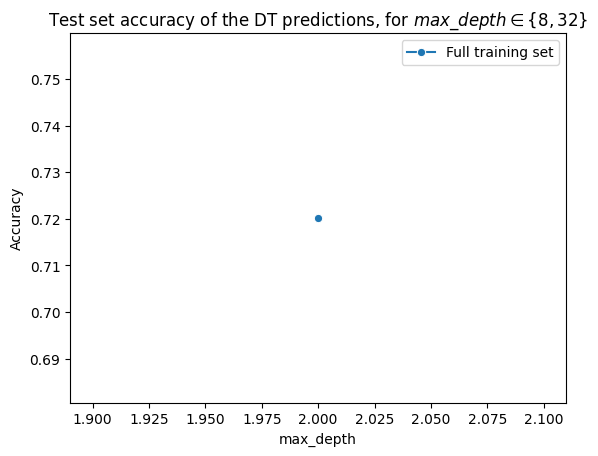

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')
plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{8,32\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

In [31]:
y = sex
X = train_df.drop(columns=['participant_id'], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
max_depth_range = [2]
acc = []
for md in max_depth_range:
  s_model, score = train_test_DT(X_train, X_test, y_train, y_test, md)
  joblib.dump(s_model, 'rf_sex_predict.pkl')
  print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
  acc.append(float(score))

Max Depth=2, accuracy score: 0.6648199445983379


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')
plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{8,32\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

# NOW FOR THE TESTING ON THE TEST DATA

In [34]:
test_df

,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0.0,PreInt_Demos_Fam_Child_Ethnicity_1.0,PreInt_Demos_Fam_Child_Ethnicity_2.0,PreInt_Demos_Fam_Child_Ethnicity_3.0,MRI_Track_Scan_Location_3,MRI_Track_Scan_Location_4,participant_id,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,0,0,1,1,0,0,0,0,1,Cfwaf5FX7jWK,...,2.000000,12.000000,3.000000,9.000000,2.000000,7.000000,3.000000,0.000000,8.000000,8.992813
1,0,0,1,1,0,0,0,0,1,ULliyEXjy4OV,...,1.000000,7.000000,1.000000,6.000000,1.000000,5.000000,1.000000,0.000000,9.000000,7.770933
2,0,0,1,1,0,0,0,1,0,LZfeAb1xMtql,...,4.000000,15.000000,4.000000,10.000000,8.000000,6.000000,5.000000,1.000000,6.000000,9.304814
3,0,0,1,0,0,1,0,0,1,EnFOUv0YK1RG,...,2.000000,18.000000,6.000000,12.000000,5.000000,10.000000,6.000000,0.000000,10.000000,8.261350
4,0,0,1,1,0,0,0,0,1,3VbkvJ22j9Fu,...,1.890511,11.781022,2.390511,7.474453,3.945255,5.583942,4.306569,1.916058,7.726277,13.903718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,1,1,0,0,0,0,1,ZrhtdcUFpSDs,...,0.000000,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,7.000000,10.262833
250,0,0,1,1,0,0,0,0,1,UadZfjdEg7eG,...,1.000000,18.000000,7.000000,7.000000,5.000000,6.000000,11.000000,4.000000,7.000000,7.546999
251,0,0,1,1,0,0,0,1,0,IUEHiLmQAqCi,...,2.000000,16.000000,2.000000,11.000000,5.000000,9.000000,5.000000,3.000000,8.000000,10.531143
252,0,0,1,1,0,0,0,0,1,E3MvDUtJadc5,...,5.000000,21.000000,2.000000,10.000000,6.000000,5.000000,11.000000,9.000000,0.000000,12.212183


In [35]:
test_df['ADHD_Outcome'] = ""
test_df

<ipython-input-35-a32913e6e860>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ADHD_Outcome'] = ""


,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0.0,PreInt_Demos_Fam_Child_Ethnicity_1.0,PreInt_Demos_Fam_Child_Ethnicity_2.0,PreInt_Demos_Fam_Child_Ethnicity_3.0,MRI_Track_Scan_Location_3,MRI_Track_Scan_Location_4,participant_id,...,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome
0,0,0,1,1,0,0,0,0,1,Cfwaf5FX7jWK,...,12.000000,3.000000,9.000000,2.000000,7.000000,3.000000,0.000000,8.000000,8.992813,
1,0,0,1,1,0,0,0,0,1,ULliyEXjy4OV,...,7.000000,1.000000,6.000000,1.000000,5.000000,1.000000,0.000000,9.000000,7.770933,
2,0,0,1,1,0,0,0,1,0,LZfeAb1xMtql,...,15.000000,4.000000,10.000000,8.000000,6.000000,5.000000,1.000000,6.000000,9.304814,
3,0,0,1,0,0,1,0,0,1,EnFOUv0YK1RG,...,18.000000,6.000000,12.000000,5.000000,10.000000,6.000000,0.000000,10.000000,8.261350,
4,0,0,1,1,0,0,0,0,1,3VbkvJ22j9Fu,...,11.781022,2.390511,7.474453,3.945255,5.583942,4.306569,1.916058,7.726277,13.903718,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,1,1,0,0,0,0,1,ZrhtdcUFpSDs,...,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,7.000000,10.262833,
250,0,0,1,1,0,0,0,0,1,UadZfjdEg7eG,...,18.000000,7.000000,7.000000,5.000000,6.000000,11.000000,4.000000,7.000000,7.546999,
251,0,0,1,1,0,0,0,1,0,IUEHiLmQAqCi,...,16.000000,2.000000,11.000000,5.000000,9.000000,5.000000,3.000000,8.000000,10.531143,
252,0,0,1,1,0,0,0,0,1,E3MvDUtJadc5,...,21.000000,2.000000,10.000000,6.000000,5.000000,11.000000,9.000000,0.000000,12.212183,


In [36]:
X = test_df.drop(columns=['participant_id', 'ADHD_Outcome'], axis=1)
test_df['ADHD_Outcome'] = a_model.predict(X)
test_df['ADHD_Outcome']

<ipython-input-36-4790e593201b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ADHD_Outcome'] = a_model.predict(X)


,ADHD_Outcome
0,1
1,1
2,0
3,0
4,0
...,...
249,0
250,0
251,1
252,1


In [37]:
test_df['Sex_F'] = ""
test_df

<ipython-input-37-0f8fdbae3754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sex_F'] = ""


,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0.0,PreInt_Demos_Fam_Child_Ethnicity_1.0,PreInt_Demos_Fam_Child_Ethnicity_2.0,PreInt_Demos_Fam_Child_Ethnicity_3.0,MRI_Track_Scan_Location_3,MRI_Track_Scan_Location_4,participant_id,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,0,0,1,1,0,0,0,0,1,Cfwaf5FX7jWK,...,3.000000,9.000000,2.000000,7.000000,3.000000,0.000000,8.000000,8.992813,1,
1,0,0,1,1,0,0,0,0,1,ULliyEXjy4OV,...,1.000000,6.000000,1.000000,5.000000,1.000000,0.000000,9.000000,7.770933,1,
2,0,0,1,1,0,0,0,1,0,LZfeAb1xMtql,...,4.000000,10.000000,8.000000,6.000000,5.000000,1.000000,6.000000,9.304814,0,
3,0,0,1,0,0,1,0,0,1,EnFOUv0YK1RG,...,6.000000,12.000000,5.000000,10.000000,6.000000,0.000000,10.000000,8.261350,0,
4,0,0,1,1,0,0,0,0,1,3VbkvJ22j9Fu,...,2.390511,7.474453,3.945255,5.583942,4.306569,1.916058,7.726277,13.903718,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,1,1,0,0,0,0,1,ZrhtdcUFpSDs,...,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,7.000000,10.262833,0,
250,0,0,1,1,0,0,0,0,1,UadZfjdEg7eG,...,7.000000,7.000000,5.000000,6.000000,11.000000,4.000000,7.000000,7.546999,0,
251,0,0,1,1,0,0,0,1,0,IUEHiLmQAqCi,...,2.000000,11.000000,5.000000,9.000000,5.000000,3.000000,8.000000,10.531143,1,
252,0,0,1,1,0,0,0,0,1,E3MvDUtJadc5,...,2.000000,10.000000,6.000000,5.000000,11.000000,9.000000,0.000000,12.212183,1,


In [38]:
X = test_df.drop(columns=['participant_id', 'Sex_F', 'ADHD_Outcome'], axis=1)
test_df['Sex_F'] = s_model.predict(X)
test_df['Sex_F']

<ipython-input-38-57ed95653ee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sex_F'] = s_model.predict(X)


,Sex_F
0,0
1,0
2,0
3,0
4,0
...,...
249,0
250,0
251,0
252,0


In [39]:
df = test_df[['participant_id', 'ADHD_Outcome', 'Sex_F']]
df

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,0
1,ULliyEXjy4OV,1,0
2,LZfeAb1xMtql,0,0
3,EnFOUv0YK1RG,0,0
4,3VbkvJ22j9Fu,0,0
...,...,...,...
249,ZrhtdcUFpSDs,0,0
250,UadZfjdEg7eG,0,0
251,IUEHiLmQAqCi,1,0
252,E3MvDUtJadc5,1,0


In [40]:
filename = 'ami_submission_rf.csv'
df.to_csv(filename, index=False)